In [1]:
import sys
import numpy as np
import pandas as pd
import missingno as mn
import scipy.stats as ss
import seaborn as sns

from matplotlib import pyplot as plt

sys.path.insert(0, '..')
from scripts import sanity_check

### load data

In [2]:
inpatient_data = pd.read_csv('../../data/Train_Inpatientdata-1542865627584.csv')
inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [3]:
checker = sanity_check.SanityCheck(inpatient_data)

***measurement levels***

- numerical

In [4]:
num = checker.measurement_level()['numerical']

In [5]:
inpatient_data[num].head().T

,0,1,2,3,4
InscClaimAmtReimbursed,26000.0,5000.0,5000.0,5000.0,10000.0
DeductibleAmtPaid,1068.0,1068.0,1068.0,1068.0,1068.0
ClmProcedureCode_1,NaN,7092.0,NaN,331.0,3893.0
ClmProcedureCode_2,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_3,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_4,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_5,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_6,NaN,NaN,NaN,NaN,NaN


- categorical

In [6]:
cat = checker.measurement_level()['categorical']

In [7]:
inpatient_data[cat].head().T

,0,1,2,3,4
BeneID,BENE11001,BENE11001,BENE11001,BENE11011,BENE11014
ClaimID,CLM46614,CLM66048,CLM68358,CLM38412,CLM63689
ClaimStartDt,2009-04-12,2009-08-31,2009-09-17,2009-02-14,2009-08-13
ClaimEndDt,2009-04-18,2009-09-02,2009-09-20,2009-02-22,2009-08-30
Provider,PRV55912,PRV55907,PRV56046,PRV52405,PRV56614
AttendingPhysician,PHY390922,PHY318495,PHY372395,PHY369659,PHY379376
OperatingPhysician,NaN,PHY318495,NaN,PHY392961,PHY398258
OtherPhysician,NaN,NaN,PHY324689,PHY349768,NaN
AdmissionDt,2009-04-12,2009-08-31,2009-09-17,2009-02-14,2009-08-13
ClmAdmitDiagnosisCode,7866,6186,29590,431,78321


In [8]:
checker.date_columns(columns=['ClaimStartDt', 'ClaimEndDt','AdmissionDt','DischargeDt'],
                     format='%Y-%m-%d')

***missing data***

In [9]:
checker.missing_data()

total missing count:344003 (28.33119204098104%)
total rows: 40474
total columns: 30
---------------------------------------------------------------------------


BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProcedureCode_3         97.615753
C

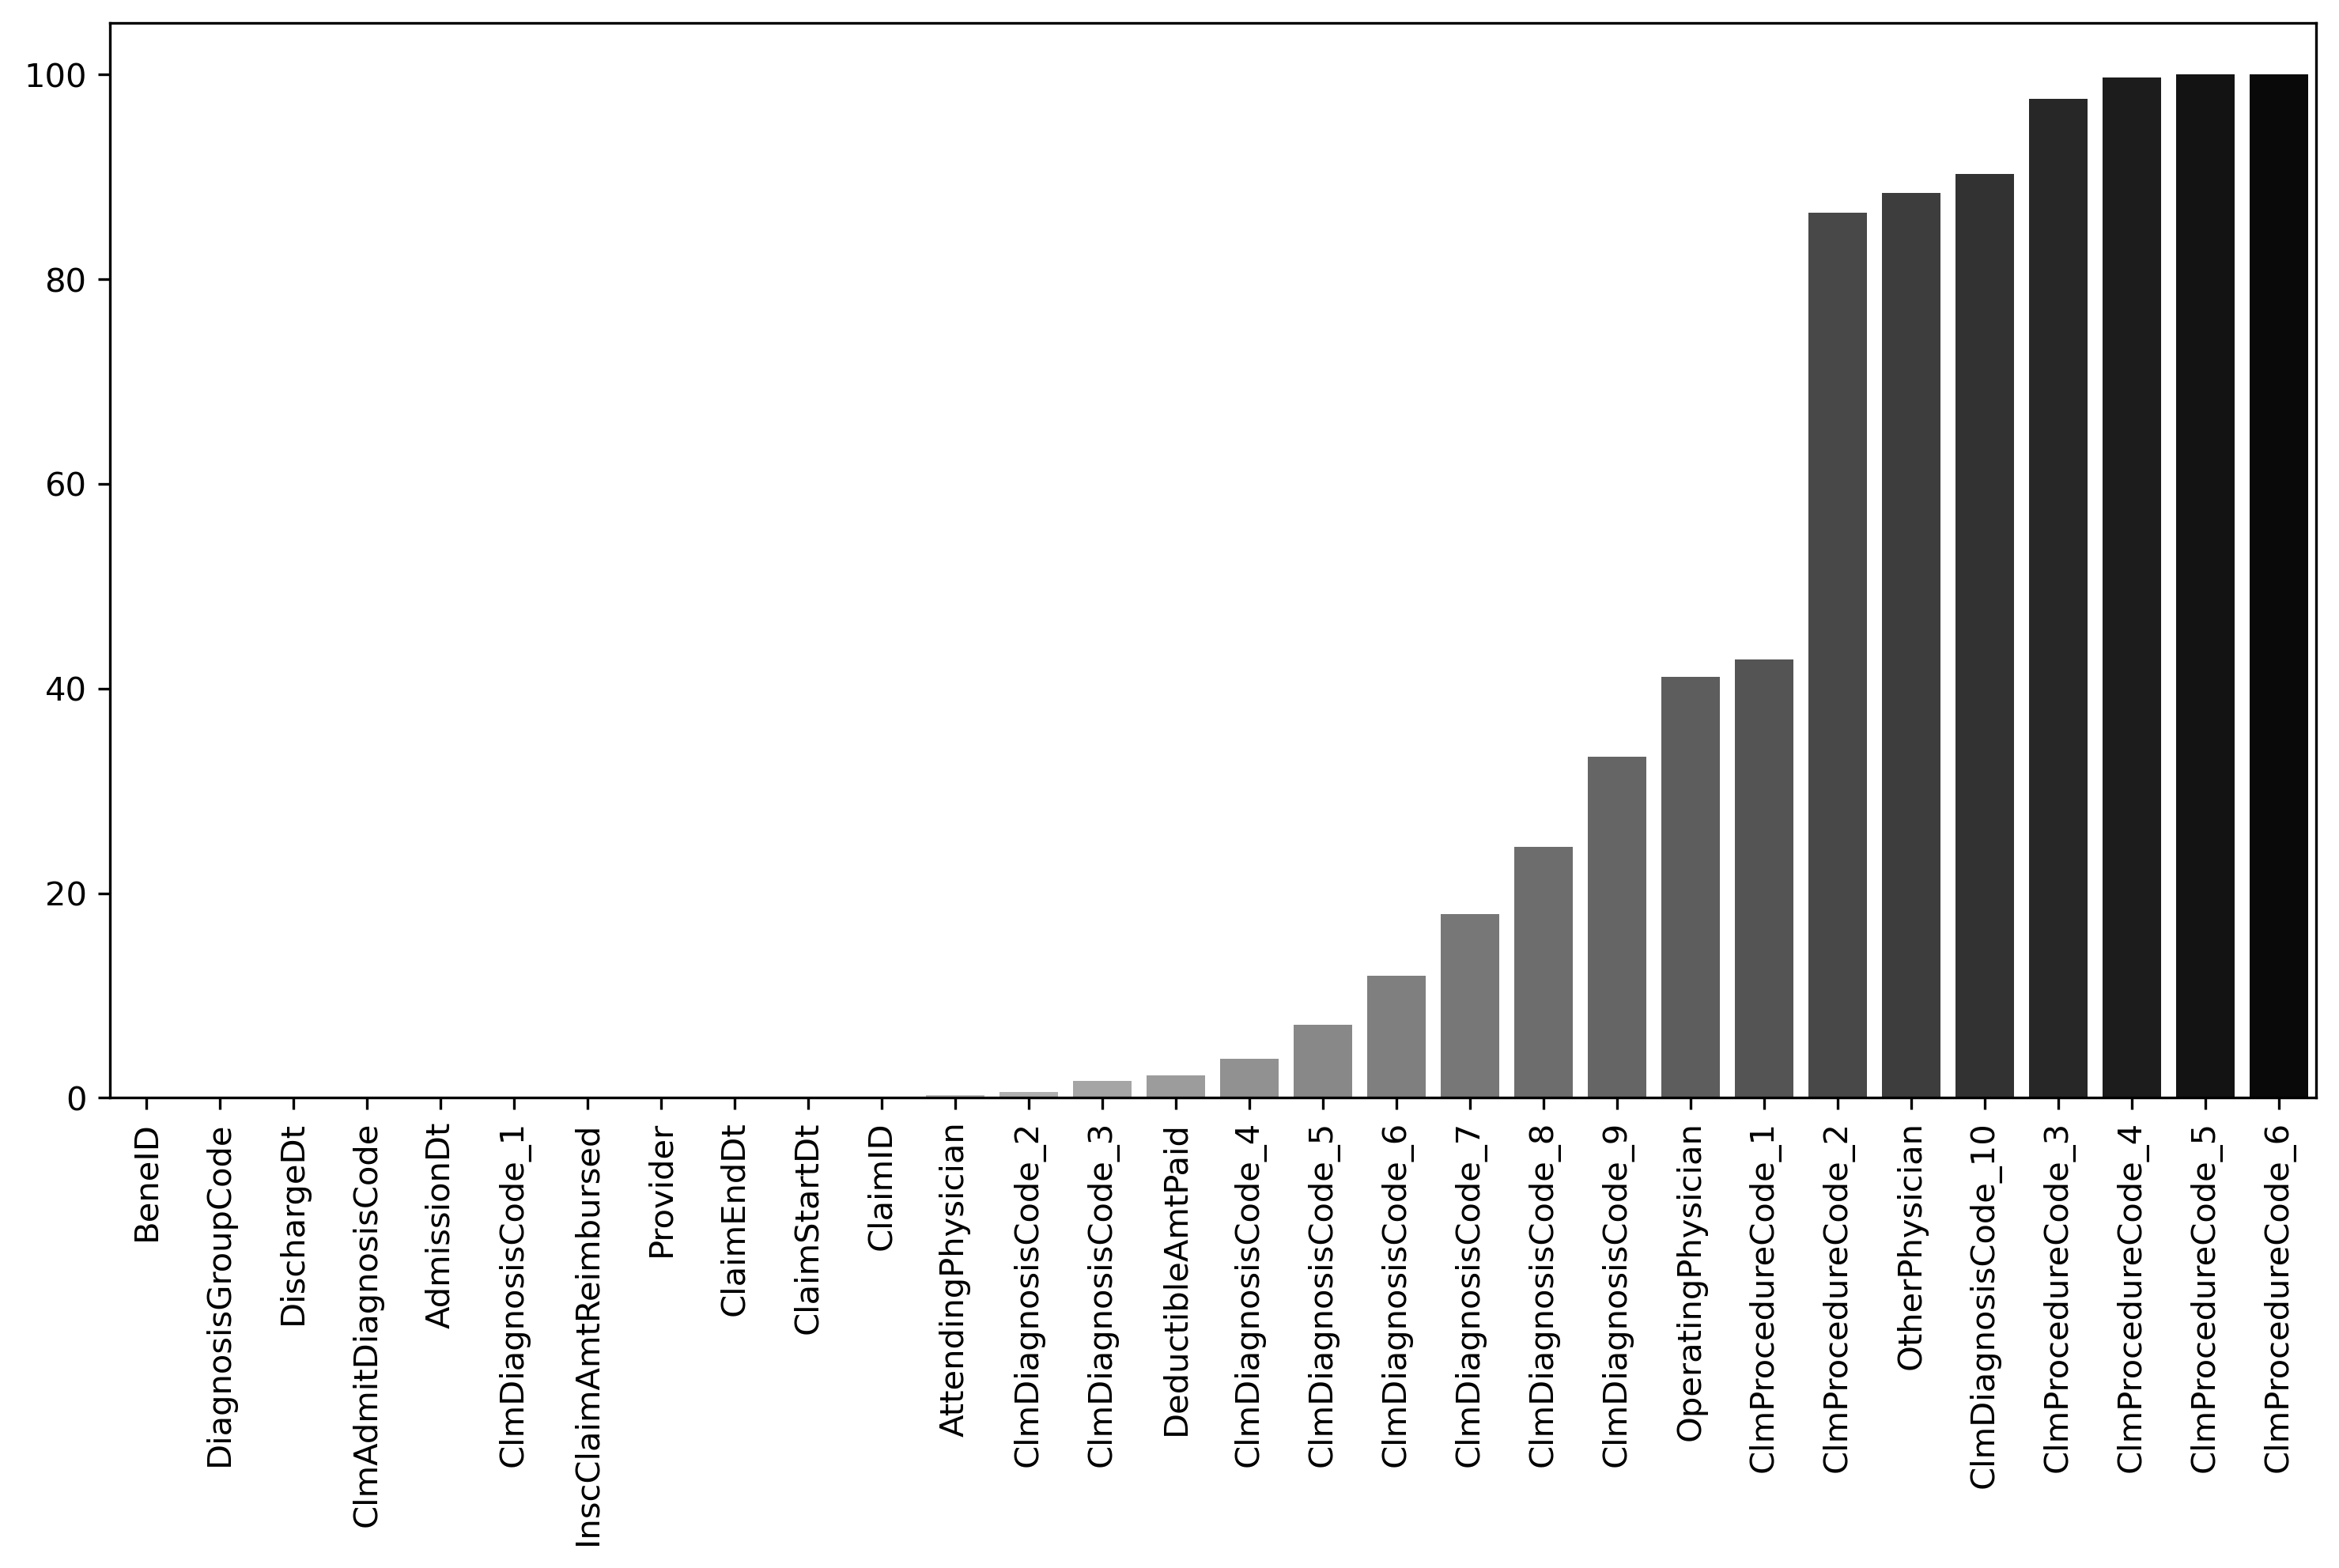

In [10]:
checker.render_case_missing_matrix(axis=0)

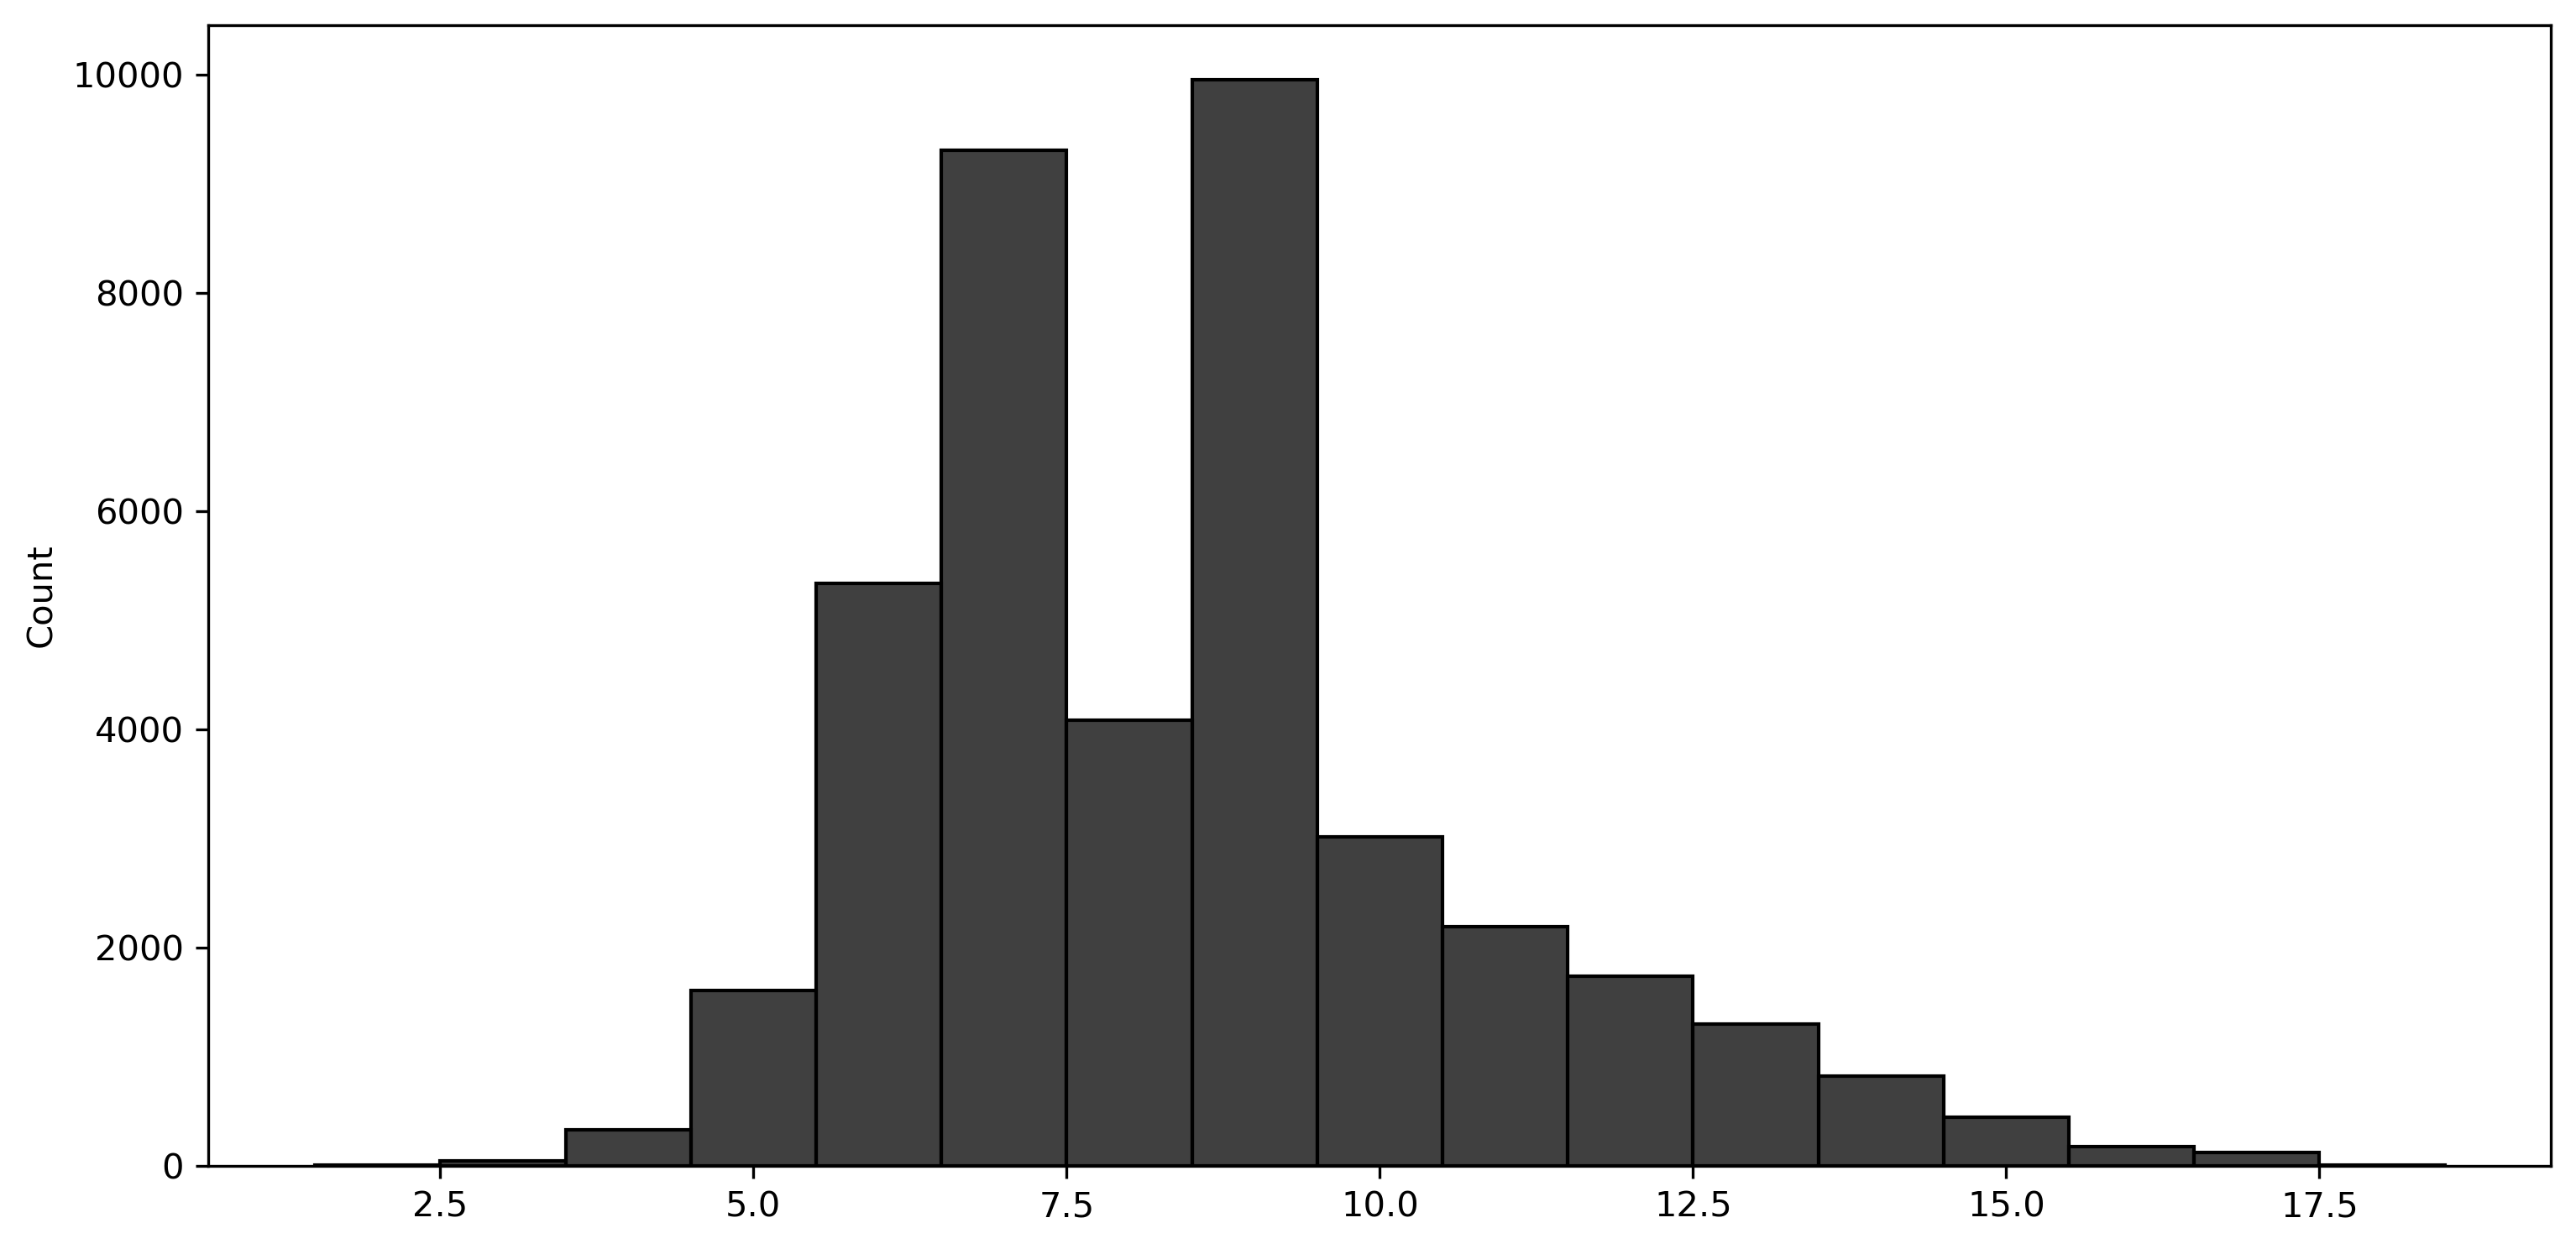

In [11]:
checker.render_case_missing_matrix(axis=1)

<Figure size 3600x1800 with 0 Axes>

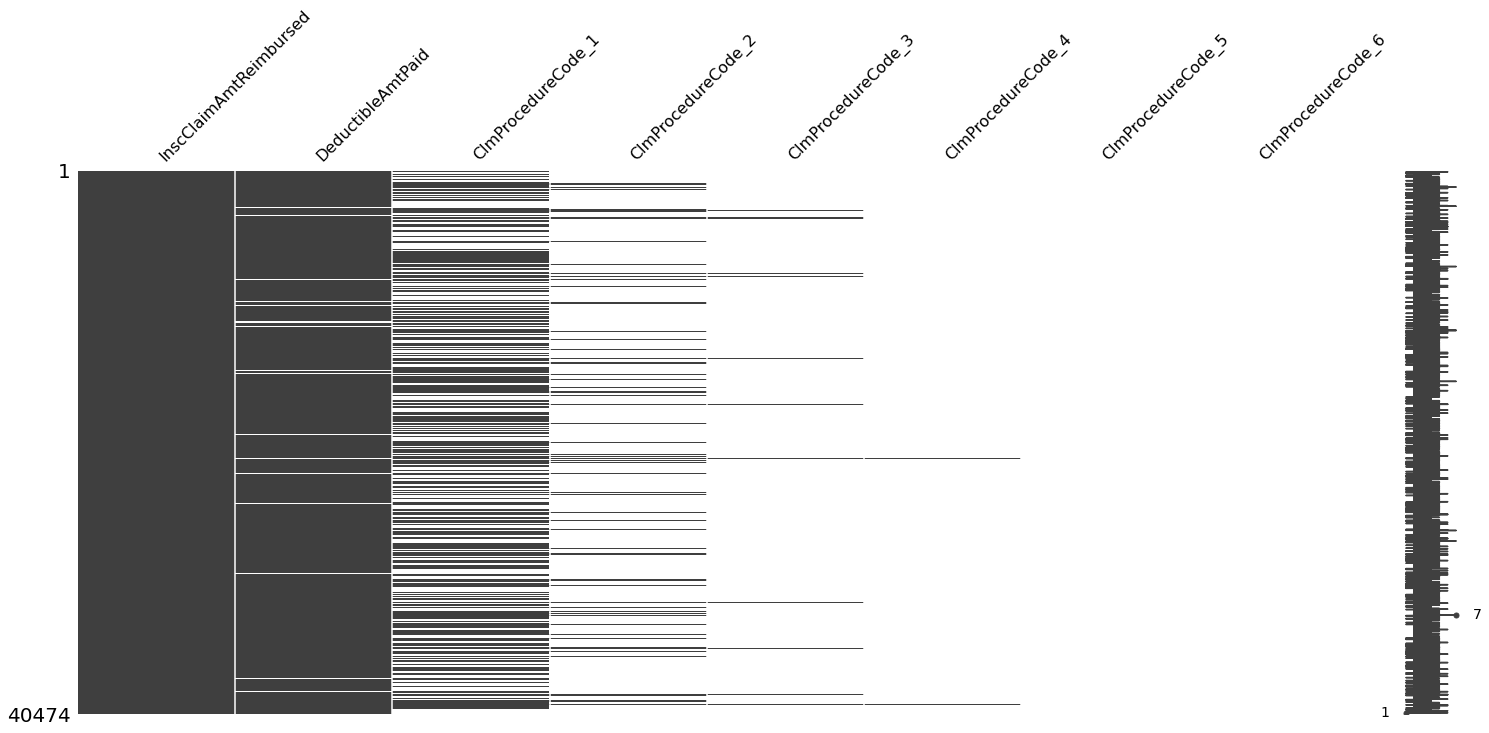

In [12]:
checker.render_missing_matrix(num)

<Figure size 3600x1800 with 0 Axes>

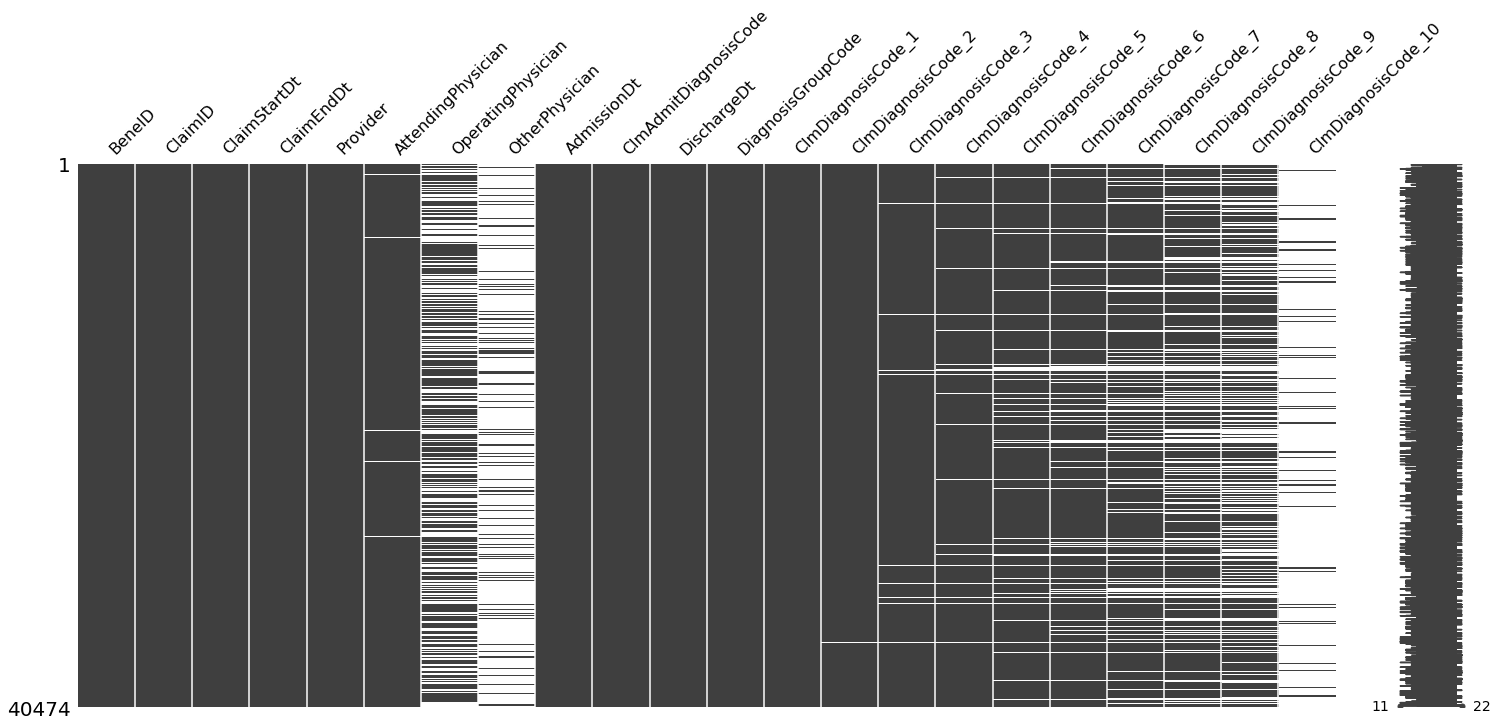

In [13]:
checker.render_missing_matrix(cat)

***cardinality***

In [14]:
checker.cardinality()

{'BeneID': [BENE134170    8
  BENE121796    7
  BENE119457    7
  BENE64791     7
  BENE62091     7
               ..
  BENE76621     1
  BENE76018     1
  BENE59741     1
  BENE117425    1
  BENE38678     1
  Name: BeneID, Length: 31289, dtype: int64,
  31289],
 'ClaimID': [CLM79571    1
  CLM42924    1
  CLM66419    1
  CLM58411    1
  CLM38851    1
             ..
  CLM58313    1
  CLM59352    1
  CLM62769    1
  CLM37287    1
  CLM75918    1
  Name: ClaimID, Length: 40474, dtype: int64,
  40474],
 'Provider': [PRV52019    516
  PRV55462    386
  PRV54367    322
  PRV53706    282
  PRV55209    275
             ... 
  PRV51958      1
  PRV51237      1
  PRV53449      1
  PRV52608      1
  PRV52699      1
  Name: Provider, Length: 2092, dtype: int64,
  2092],
 'AttendingPhysician': [PHY422134    386
  PHY341560    274
  PHY315112    208
  PHY411541    198
  PHY362864    195
              ... 
  PHY321541      1
  PHY362078      1
  PHY424937      1
  PHY405516      1
  PHY346231      

***feature magnitude***

In [15]:
checker.magnitude()


,min,max,mean,median,variance,std,5%,25%,75%,95%
InscClaimAmtReimbursed,0.0,125000.0,10087.884074,7000.0,1.061512e+08,10302.972121,0.0,0.0,0.0,0.0
DeductibleAmtPaid,1068.0,1068.0,1068.000000,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN
ClmProcedureCode_1,11.0,9999.0,5894.611759,NaN,9.297856e+06,3049.238534,NaN,NaN,NaN,NaN
ClmProcedureCode_2,42.0,9999.0,4103.738174,NaN,4.112769e+06,2027.996212,NaN,NaN,NaN,NaN
ClmProcedureCode_3,42.0,9999.0,4226.355440,NaN,5.205600e+06,2281.578496,NaN,NaN,NaN,NaN
ClmProcedureCode_4,42.0,9986.0,4070.172414,NaN,3.943380e+06,1985.794600,NaN,NaN,NaN,NaN
ClmProcedureCode_5,2724.0,9982.0,5269.444444,NaN,6.870043e+06,2621.076671,NaN,NaN,NaN,NaN
ClmProcedureCode_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
